In [1]:
# importing libraries
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import XGBClassifier

In [3]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [4]:
# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
attrition = pd.read_csv('E:/College Stuff/Sem2/Journal/attrition.csv')

In [6]:
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
attrition.drop(columns=["Over18"],axis=1,inplace = True)

In [8]:
attrition.describe(include="object").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


In [9]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
cat_columns=attrition.select_dtypes(include="object").columns

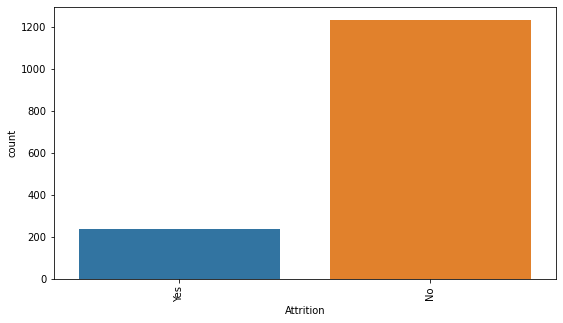

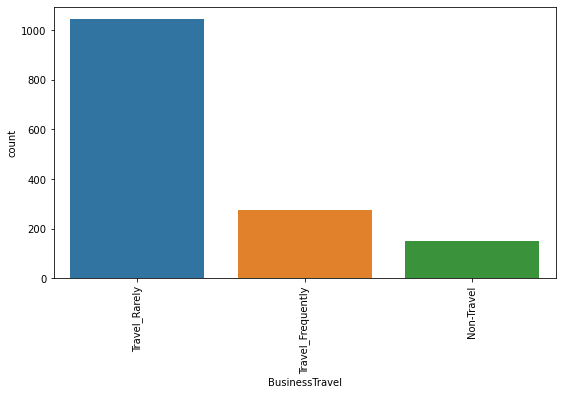

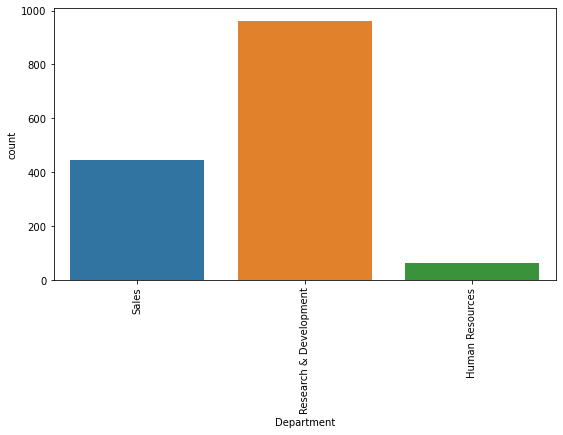

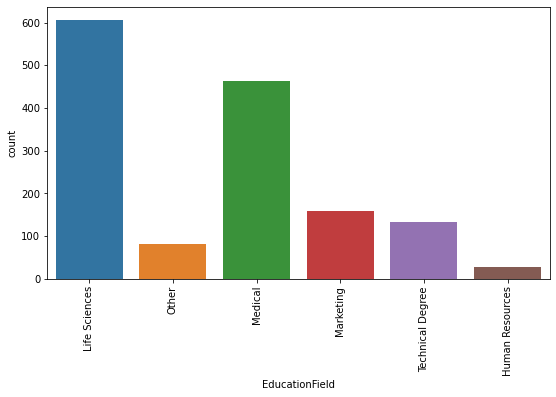

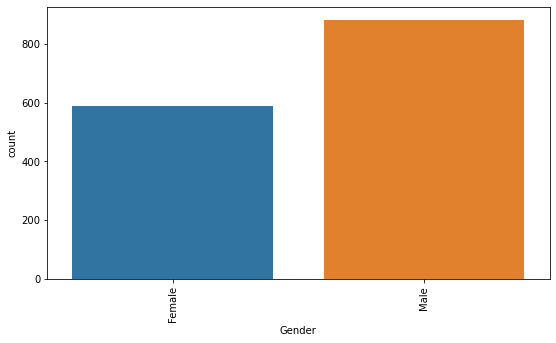

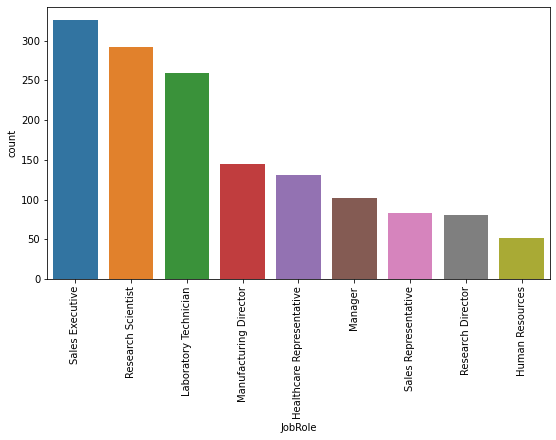

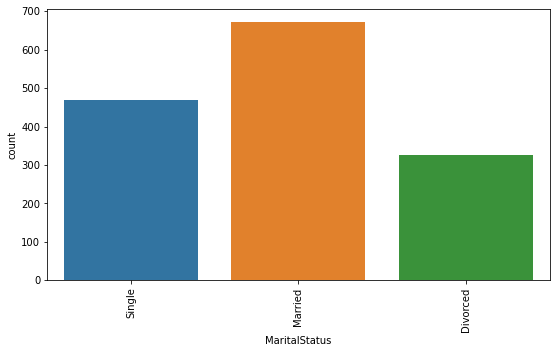

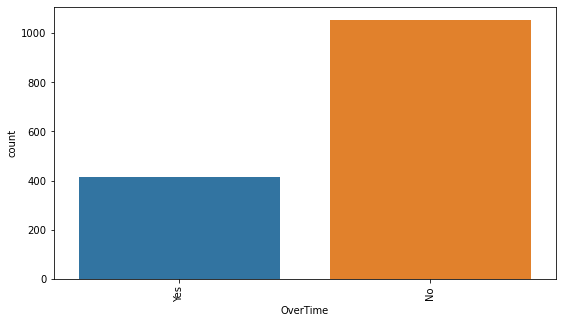

In [11]:
for i in cat_columns:
    plt.figure(figsize=(9,5));
    sns.countplot(attrition[i]);
    plt.xticks(rotation=90);
    plt.show();

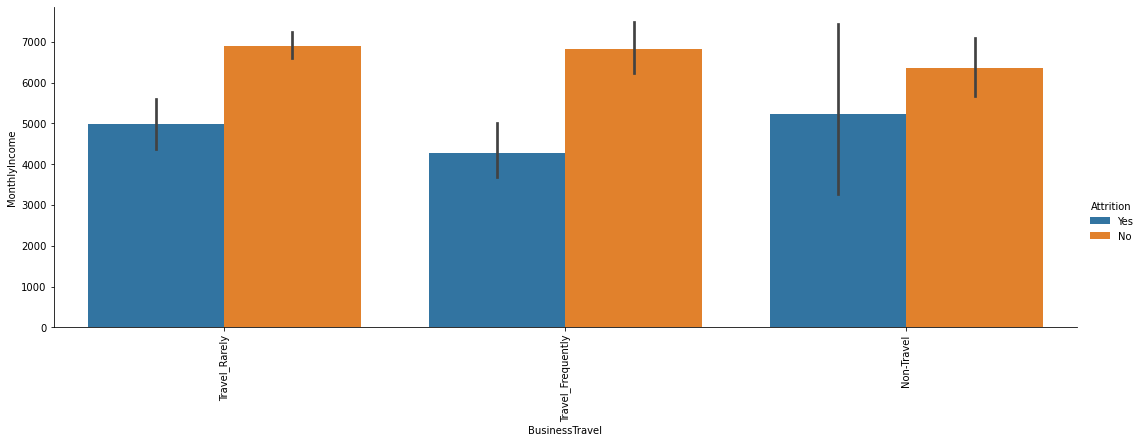

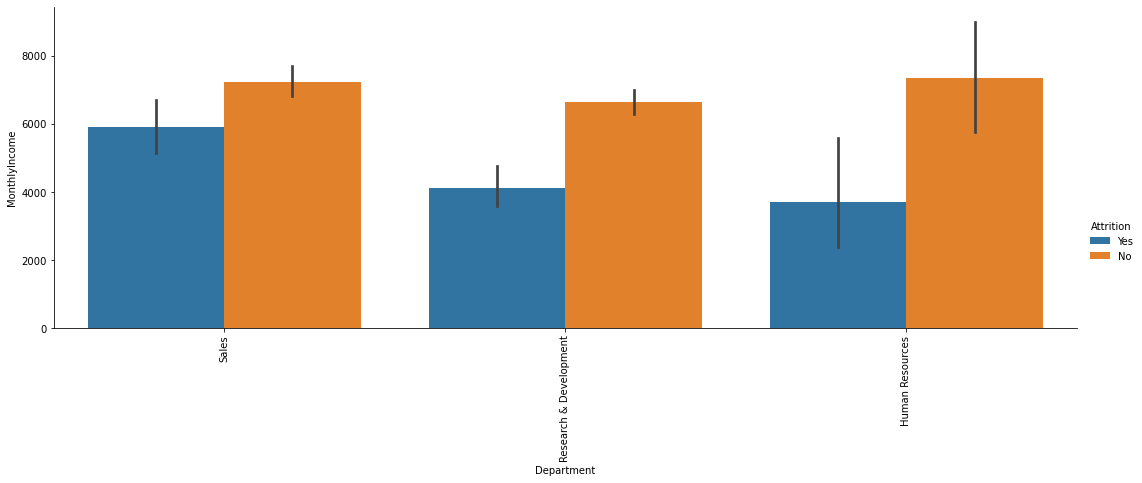

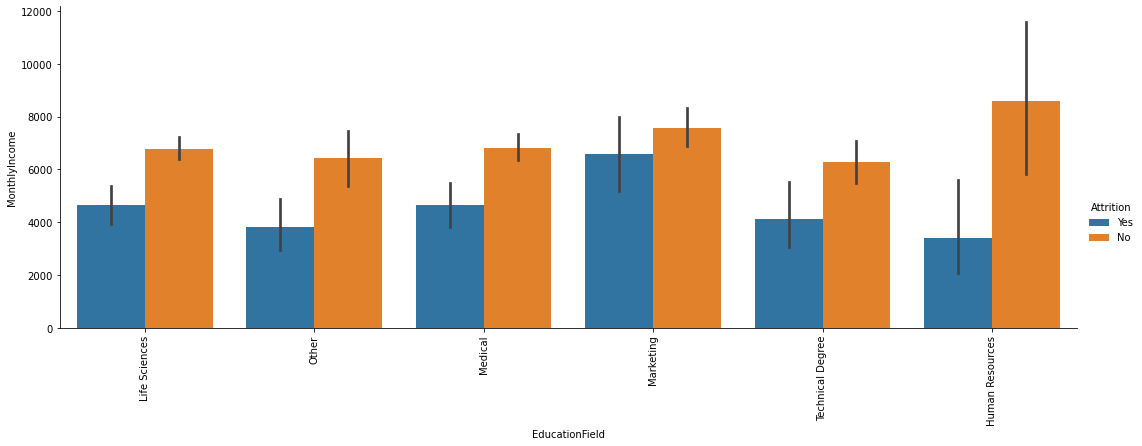

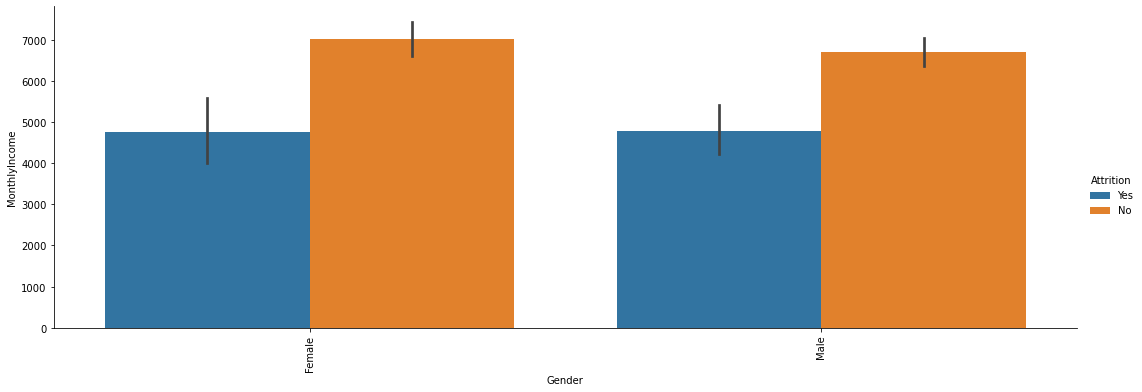

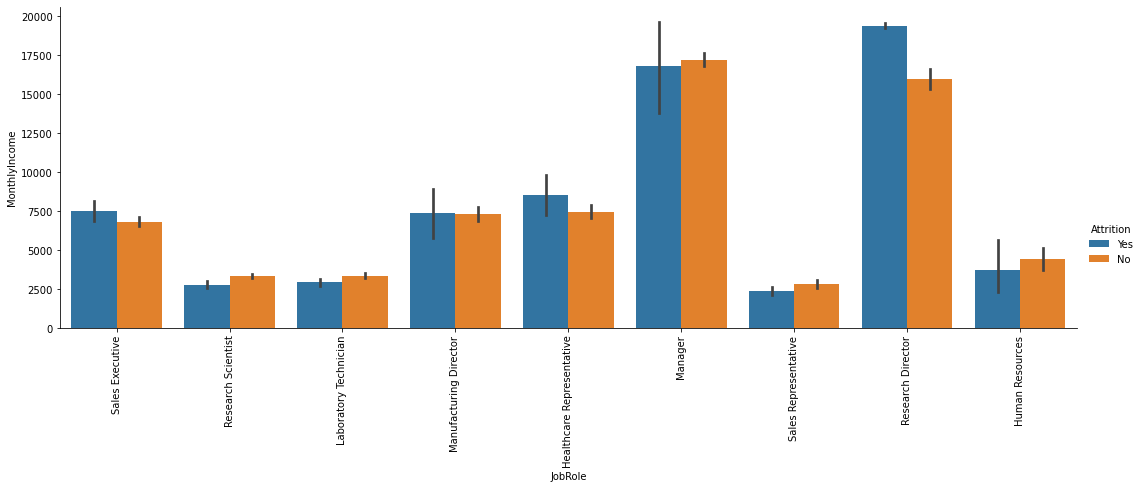

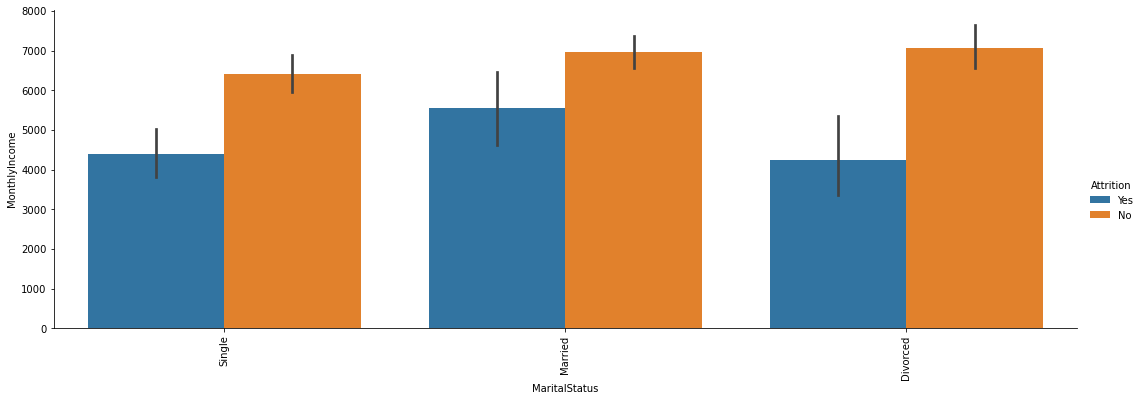

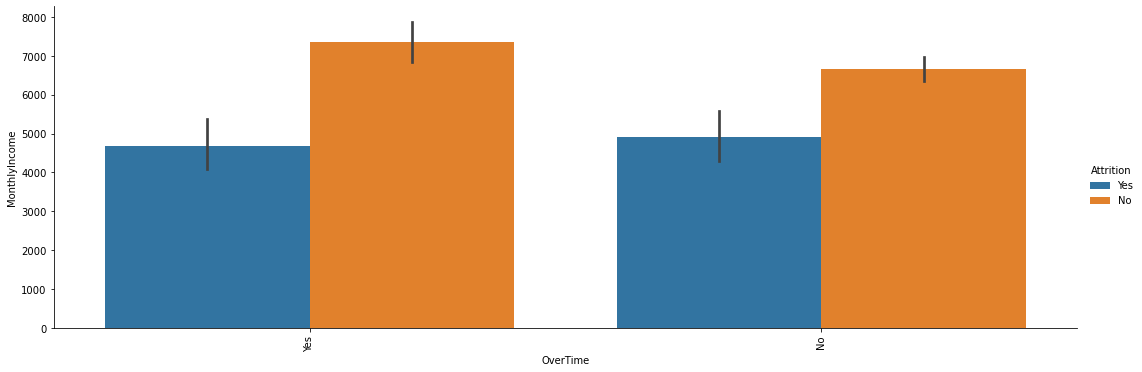

In [12]:
for i in cat_columns[1:]:
    sns.catplot(x=i,y='MonthlyIncome',hue="Attrition",data=attrition,kind="bar",aspect=3);
    plt.xticks(rotation=90);

In [13]:
attrition.drop(columns=["EmployeeCount","StandardHours"],axis=1,inplace = True)

In [14]:
num_columns=attrition.select_dtypes(exclude="object").columns

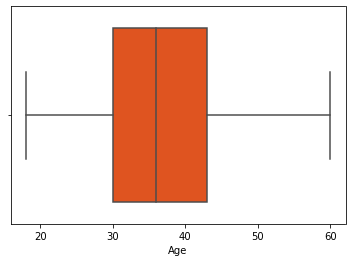

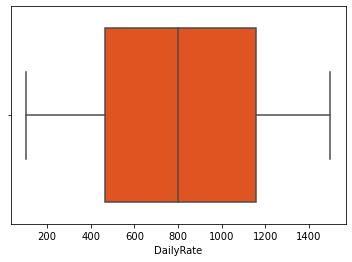

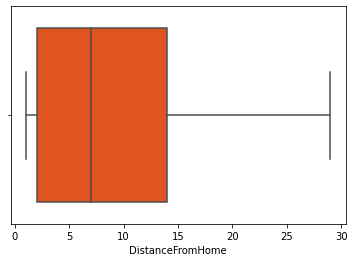

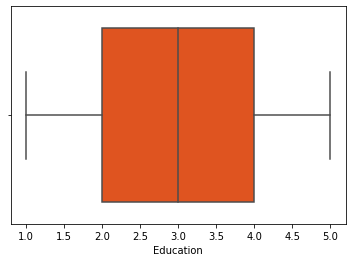

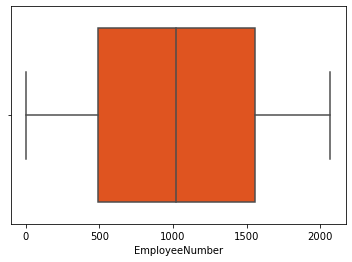

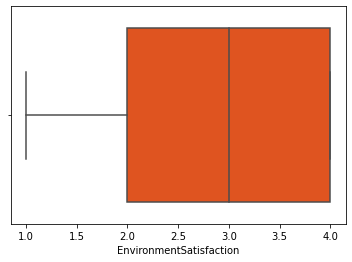

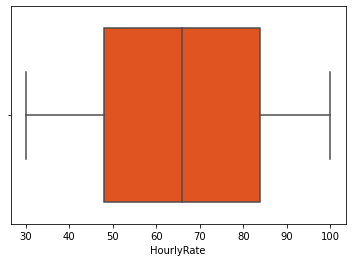

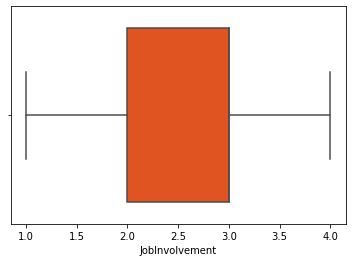

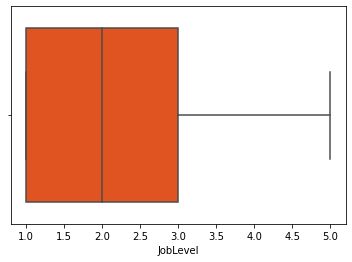

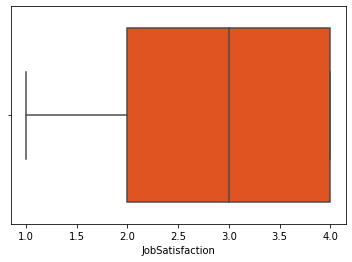

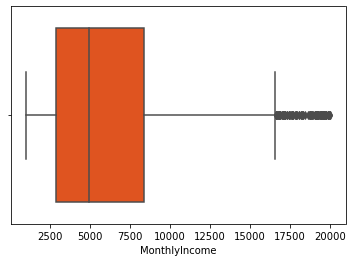

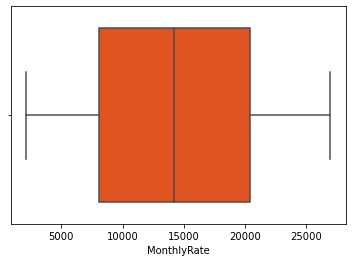

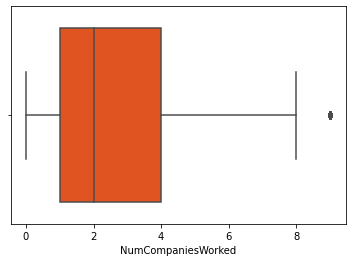

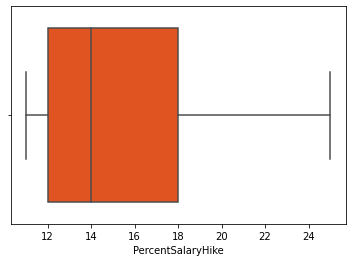

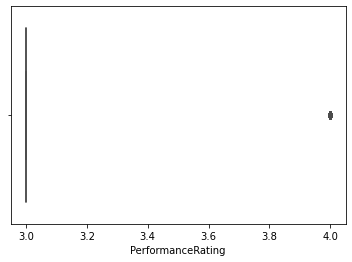

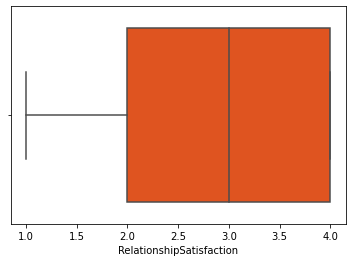

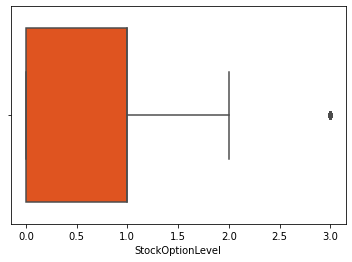

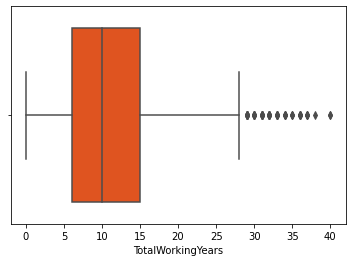

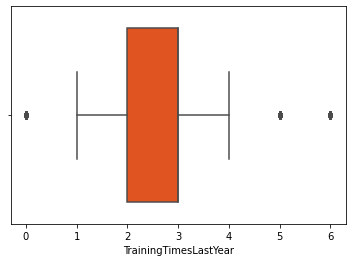

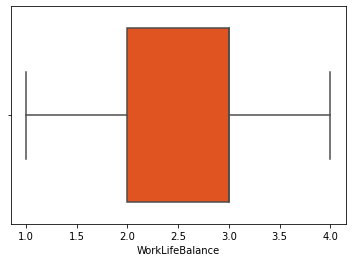

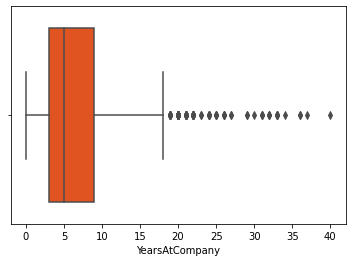

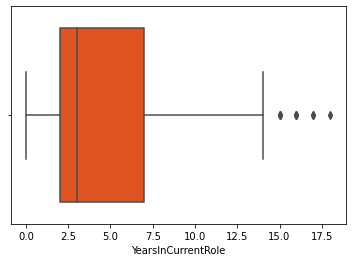

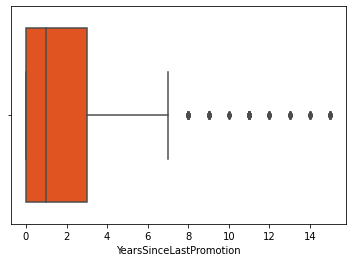

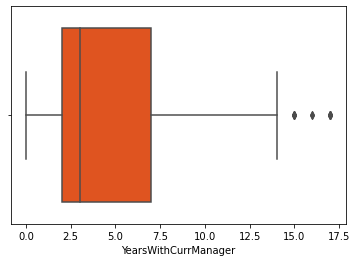

In [15]:
for i in num_columns:
    sns.boxplot(attrition[i],color="orangered");
    plt.show();

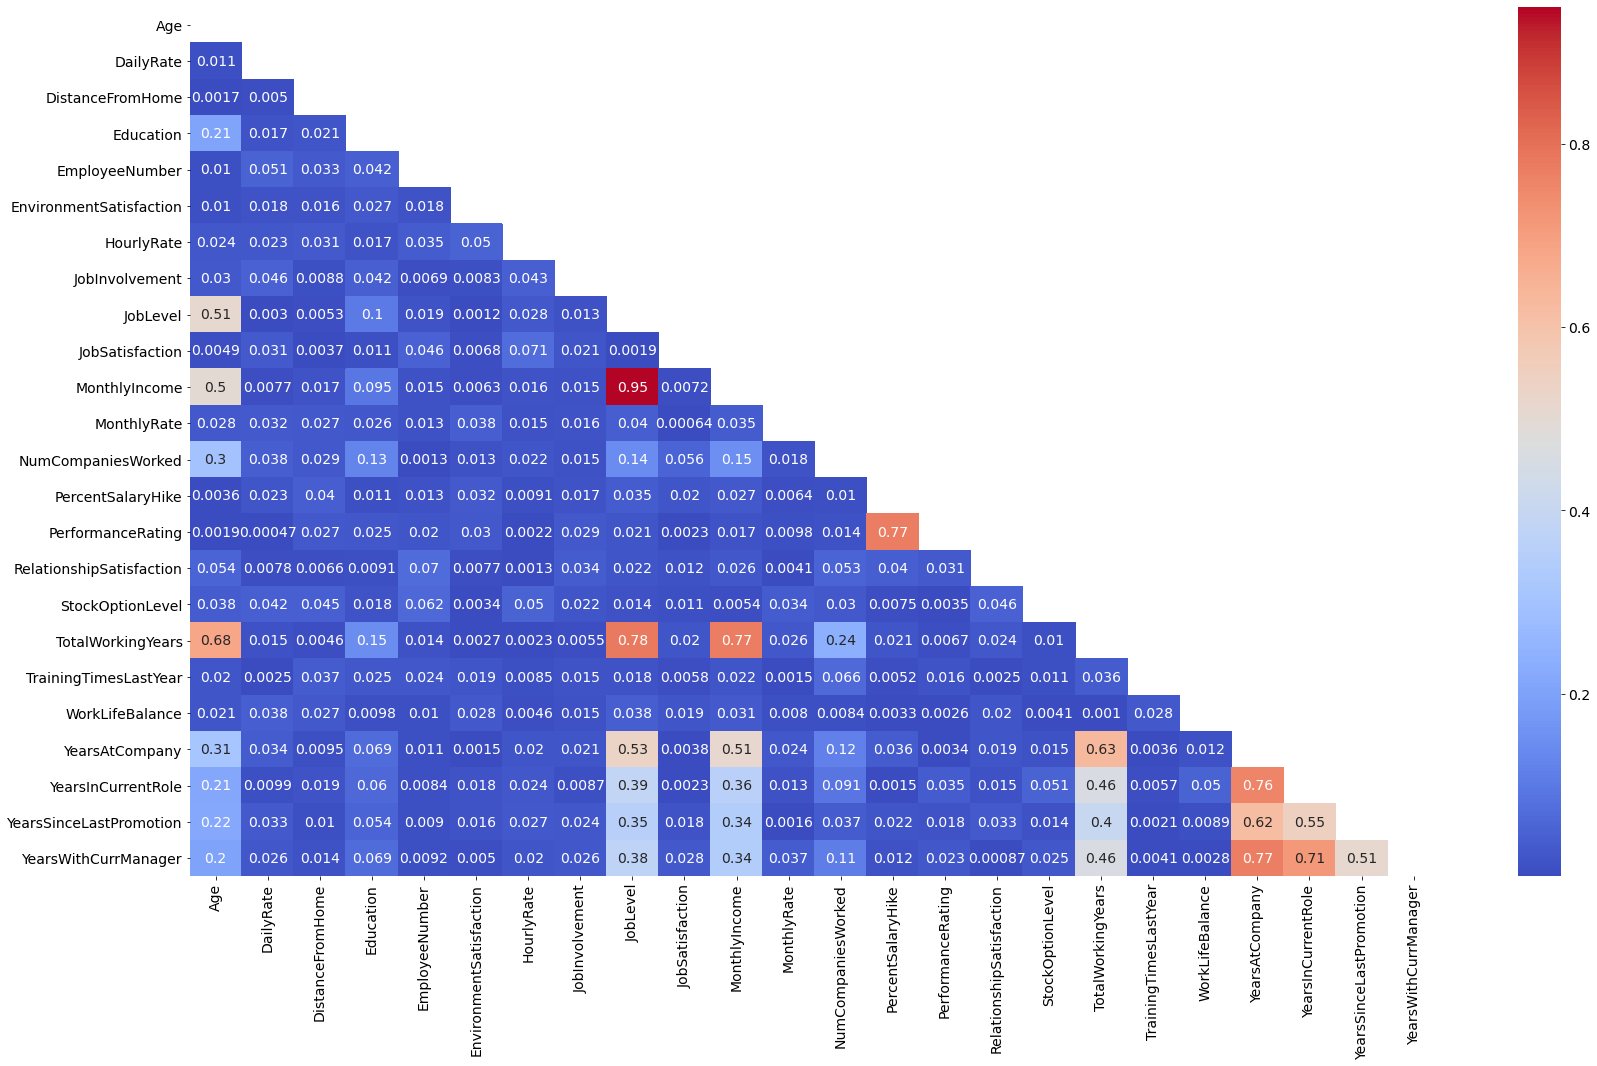

In [16]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(28,16))
corr=attrition.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);

In [17]:
attrition_new = attrition[['Age','Attrition','MaritalStatus','YearsAtCompany','JobInvolvement','BusinessTravel','JobSatisfaction','PerformanceRating','EnvironmentSatisfaction']]

In [18]:
attrition_new

,Age,Attrition,MaritalStatus,YearsAtCompany,JobInvolvement,BusinessTravel,JobSatisfaction,PerformanceRating,EnvironmentSatisfaction
0,41,Yes,Single,6,3,Travel_Rarely,4,3,2
1,49,No,Married,10,2,Travel_Frequently,2,4,3
2,37,Yes,Single,0,2,Travel_Rarely,3,3,4
3,33,No,Married,8,3,Travel_Frequently,3,3,4
4,27,No,Married,2,3,Travel_Rarely,2,3,1
...,...,...,...,...,...,...,...,...,...
1465,36,No,Married,5,4,Travel_Frequently,4,3,3
1466,39,No,Married,7,2,Travel_Rarely,1,3,4
1467,27,No,Married,6,4,Travel_Rarely,2,4,2
1468,49,No,Married,9,2,Travel_Frequently,2,3,4


In [19]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
attrition_new["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

In [20]:
attrition_new.drop('Attrition',axis=1,inplace =True)

In [21]:
attrition_new

,Age,MaritalStatus,YearsAtCompany,JobInvolvement,BusinessTravel,JobSatisfaction,PerformanceRating,EnvironmentSatisfaction,Attrition_numerical
0,41,Single,6,3,Travel_Rarely,4,3,2,1
1,49,Married,10,2,Travel_Frequently,2,4,3,0
2,37,Single,0,2,Travel_Rarely,3,3,4,1
3,33,Married,8,3,Travel_Frequently,3,3,4,0
4,27,Married,2,3,Travel_Rarely,2,3,1,0
...,...,...,...,...,...,...,...,...,...
1465,36,Married,5,4,Travel_Frequently,4,3,3,0
1466,39,Married,7,2,Travel_Rarely,1,3,4,0
1467,27,Married,6,4,Travel_Rarely,2,4,2,0
1468,49,Married,9,2,Travel_Frequently,2,3,4,0


In [22]:
attrition_final = pd.get_dummies(attrition_new,drop_first=True)

In [23]:
attrition_final.head()

,Age,YearsAtCompany,JobInvolvement,JobSatisfaction,PerformanceRating,EnvironmentSatisfaction,Attrition_numerical,MaritalStatus_Married,MaritalStatus_Single,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,6,3,4,3,2,1,0,1,0,1
1,49,10,2,2,4,3,0,1,0,1,0
2,37,0,2,3,3,4,1,0,1,0,1
3,33,8,3,3,3,4,0,1,0,1,0
4,27,2,3,2,3,1,0,1,0,0,1


In [24]:
X = attrition_final.drop('Attrition_numerical',axis = 1)
X

,Age,YearsAtCompany,JobInvolvement,JobSatisfaction,PerformanceRating,EnvironmentSatisfaction,MaritalStatus_Married,MaritalStatus_Single,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,6,3,4,3,2,0,1,0,1
1,49,10,2,2,4,3,1,0,1,0
2,37,0,2,3,3,4,0,1,0,1
3,33,8,3,3,3,4,1,0,1,0
4,27,2,3,2,3,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1465,36,5,4,4,3,3,1,0,1,0
1466,39,7,2,1,3,4,1,0,0,1
1467,27,6,4,2,4,2,1,0,0,1
1468,49,9,2,2,3,4,1,0,1,0


In [25]:
Y = attrition_final['Attrition_numerical']

In [26]:
Y = Y.to_numpy()
Y=Y.reshape(1470,)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)

In [28]:
#instantiate SVM
from sklearn.svm import SVC
svm=SVC()
#Fit the model to the training dataset
svm.fit(X_train,y_train)
#Predict using the test set
predictions_svm=svm.predict(X_test)
#instantiate Evaluation matrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions_svm))
print("Accuracy score for Support vector ",accuracy_score(y_test, predictions_svm))

[[255   0]
 [ 39   0]]
Accuracy score for Support vector  0.8673469387755102


In [29]:
#Instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#Fit the model to the training set and predict using the test set
lr.fit(X_train,y_train)
predictions_lr=lr.predict(X_test)
#Evaluation matrics
print(confusion_matrix(y_test,predictions_lr))
print("Accuracy score for  Logistic Regression ",accuracy_score(y_test,predictions_lr))

[[252   3]
 [ 34   5]]
Accuracy score for  Logistic Regression  0.8741496598639455


In [30]:
#Instantiate Decision tree model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
#Fit and predict the model
dt.fit(X_train,y_train)
predictions_dt=dt.predict(X_test)
#Evaluation matrics
print(confusion_matrix(y_test,predictions_dt))
print("Accuracy score for Decision tree model ",accuracy_score(y_test,predictions_dt))

[[213  42]
 [ 24  15]]
Accuracy score for Decision tree model  0.7755102040816326


In [31]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test,y_pred)

[15:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8469387755102041

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       255
           1       0.38      0.26      0.31        39

    accuracy                           0.85       294
   macro avg       0.64      0.60      0.61       294
weighted avg       0.82      0.85      0.83       294



In [33]:
#import Voting Classifier
from sklearn.ensemble import VotingClassifier
#instantiating three classifiers
logReg= LogisticRegression()
dTree= DecisionTreeClassifier()
svm= SVC()
xgb=XGBClassifier()
voting_clf = VotingClassifier(estimators=[ ('SVC',svm),('DecisionTree',dTree), ('LogReg', logReg),("xgb",xgb)], voting='hard')
#fit and predict using training and testing dataset respectively
voting_clf.fit(X_train, y_train)
predictions_vc = voting_clf.predict(X_test)
#Evaluation matrics
print(confusion_matrix(y_test,predictions_vc))
print("Accuracy score for Voting Classifier  model ",accuracy_score(y_test,predictions_vc))

[15:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[254   1]
 [ 36   3]]
Accuracy score for Voting Classifier  model  0.8741496598639455


## Deep Neural Networks

In [34]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
# Setting the hyperparameters
dropout = 0.1
epochs = 100
batch_size = 30
optimizer = 'adam'
k = 20

In [36]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(16, kernel_initializer="truncated_normal", activation = 'relu', input_shape = (X.shape[1],)))
    classifier.add(Dropout(dropout))
    classifier.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', )) #outputlayer
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ["accuracy"])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = batch_size, epochs = epochs)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 30)
max = accuracies.max()

Epoch 1/100
38/38 [==============================] - 0s 808us/step - loss: 0.6832 - accuracy: 0.7876
Epoch 2/100
38/38 [==============================] - 0s 716us/step - loss: 0.6445 - accuracy: 0.8349
Epoch 3/100
38/38 [==============================] - 0s 833us/step - loss: 0.5889 - accuracy: 0.8323
Epoch 4/100
38/38 [==============================] - 0s 799us/step - loss: 0.5246 - accuracy: 0.8359
Epoch 5/100
38/38 [==============================] - 0s 906us/step - loss: 0.4712 - accuracy: 0.8312
Epoch 6/100
38/38 [==============================] - 0s 778us/step - loss: 0.4683 - accuracy: 0.8104
Epoch 7/100
38/38 [==============================] - 0s 949us/step - loss: 0.4337 - accuracy: 0.8205
Epoch 8/100
38/38 [==============================] - 0s 788us/step - loss: 0.4513 - accuracy: 0.8135
Epoch 9/100
38/38 [==============================] - 0s 847us/step - loss: 0.4401 - accuracy: 0.8114
Epoch 10/100
38/38 [==============================] - 0s 803us/step - loss: 0.4087 - accura

38/38 [==============================] - 0s 943us/step - loss: 0.3627 - accuracy: 0.8643
Epoch 59/100
38/38 [==============================] - 0s 781us/step - loss: 0.3701 - accuracy: 0.8566
Epoch 60/100
38/38 [==============================] - 0s 674us/step - loss: 0.3705 - accuracy: 0.8538
Epoch 61/100
38/38 [==============================] - 0s 647us/step - loss: 0.3591 - accuracy: 0.8634
Epoch 62/100
38/38 [==============================] - 0s 674us/step - loss: 0.3721 - accuracy: 0.8579
Epoch 63/100
38/38 [==============================] - 0s 729us/step - loss: 0.3924 - accuracy: 0.8468
Epoch 64/100
38/38 [==============================] - 0s 717us/step - loss: 0.3901 - accuracy: 0.8524
Epoch 65/100
38/38 [==============================] - 0s 677us/step - loss: 0.3798 - accuracy: 0.8447
Epoch 66/100
38/38 [==============================] - 0s 811us/step - loss: 0.3701 - accuracy: 0.8572
Epoch 67/100
38/38 [==============================] - 0s 934us/step - loss: 0.3744 - accuracy: 

38/38 [==============================] - 0s 701us/step - loss: 0.3975 - accuracy: 0.8531
Epoch 17/100
38/38 [==============================] - 0s 713us/step - loss: 0.3943 - accuracy: 0.8548
Epoch 18/100
38/38 [==============================] - 0s 721us/step - loss: 0.3692 - accuracy: 0.8609
Epoch 19/100
38/38 [==============================] - 0s 690us/step - loss: 0.3889 - accuracy: 0.8631
Epoch 20/100
38/38 [==============================] - 0s 720us/step - loss: 0.4210 - accuracy: 0.8428
Epoch 21/100
38/38 [==============================] - 0s 686us/step - loss: 0.3841 - accuracy: 0.8583
Epoch 22/100
38/38 [==============================] - 0s 690us/step - loss: 0.3975 - accuracy: 0.8574
Epoch 23/100
38/38 [==============================] - 0s 775us/step - loss: 0.3700 - accuracy: 0.8589
Epoch 24/100
38/38 [==============================] - 0s 720us/step - loss: 0.3841 - accuracy: 0.8664
Epoch 25/100
38/38 [==============================] - 0s 757us/step - loss: 0.3549 - accuracy: 

38/38 [==============================] - 0s 690us/step - loss: 0.3645 - accuracy: 0.8682
Epoch 76/100
38/38 [==============================] - 0s 671us/step - loss: 0.3769 - accuracy: 0.8468
Epoch 77/100
38/38 [==============================] - 0s 649us/step - loss: 0.3970 - accuracy: 0.8348
Epoch 78/100
38/38 [==============================] - 0s 666us/step - loss: 0.3823 - accuracy: 0.8575
Epoch 79/100
38/38 [==============================] - 0s 644us/step - loss: 0.3493 - accuracy: 0.8613
Epoch 80/100
38/38 [==============================] - 0s 707us/step - loss: 0.3775 - accuracy: 0.8474
Epoch 81/100
38/38 [==============================] - 0s 700us/step - loss: 0.4033 - accuracy: 0.8397
Epoch 82/100
38/38 [==============================] - 0s 704us/step - loss: 0.3490 - accuracy: 0.8669
Epoch 83/100
38/38 [==============================] - 0s 696us/step - loss: 0.3802 - accuracy: 0.8665
Epoch 84/100
38/38 [==============================] - 0s 690us/step - loss: 0.3675 - accuracy: 

38/38 [==============================] - 0s 677us/step - loss: 0.4042 - accuracy: 0.8416
Epoch 20/100
38/38 [==============================] - 0s 663us/step - loss: 0.4157 - accuracy: 0.8409
Epoch 21/100
38/38 [==============================] - 0s 697us/step - loss: 0.3795 - accuracy: 0.8604
Epoch 22/100
38/38 [==============================] - 0s 660us/step - loss: 0.3913 - accuracy: 0.8480
Epoch 23/100
38/38 [==============================] - 0s 648us/step - loss: 0.4098 - accuracy: 0.8449
Epoch 24/100
38/38 [==============================] - 0s 632us/step - loss: 0.4042 - accuracy: 0.8341
Epoch 25/100
38/38 [==============================] - 0s 619us/step - loss: 0.3783 - accuracy: 0.8620
Epoch 26/100
38/38 [==============================] - 0s 651us/step - loss: 0.4066 - accuracy: 0.8408
Epoch 27/100
38/38 [==============================] - 0s 638us/step - loss: 0.4185 - accuracy: 0.8384
Epoch 28/100
38/38 [==============================] - 0s 666us/step - loss: 0.3408 - accuracy: 

38/38 [==============================] - 0s 982us/step - loss: 0.4342 - accuracy: 0.8243
Epoch 100/100
2/2 [==============================] - 0s 973us/step - loss: 0.2413 - accuracy: 0.9231
Epoch 1/100
38/38 [==============================] - 0s 755us/step - loss: 0.6850 - accuracy: 0.6866
Epoch 2/100
38/38 [==============================] - 0s 683us/step - loss: 0.6493 - accuracy: 0.8372
Epoch 3/100
38/38 [==============================] - 0s 766us/step - loss: 0.6103 - accuracy: 0.8089
Epoch 4/100
38/38 [==============================] - 0s 773us/step - loss: 0.5475 - accuracy: 0.8328
Epoch 5/100
38/38 [==============================] - 0s 735us/step - loss: 0.5090 - accuracy: 0.8227
Epoch 6/100
38/38 [==============================] - 0s 801us/step - loss: 0.4571 - accuracy: 0.8371
Epoch 7/100
38/38 [==============================] - 0s 873us/step - loss: 0.4342 - accuracy: 0.8307
Epoch 8/100
38/38 [==============================] - 0s 736us/step - loss: 0.4391 - accuracy: 0.8209
Ep

38/38 [==============================] - 0s 722us/step - loss: 0.4056 - accuracy: 0.8387
Epoch 44/100
38/38 [==============================] - 0s 841us/step - loss: 0.3891 - accuracy: 0.8452
Epoch 45/100
38/38 [==============================] - 0s 794us/step - loss: 0.3562 - accuracy: 0.8706
Epoch 46/100
38/38 [==============================] - 0s 794us/step - loss: 0.3771 - accuracy: 0.8560
Epoch 47/100
38/38 [==============================] - 0s 846us/step - loss: 0.3580 - accuracy: 0.8673
Epoch 48/100
38/38 [==============================] - 0s 836us/step - loss: 0.3571 - accuracy: 0.8681
Epoch 49/100
38/38 [==============================] - 0s 819us/step - loss: 0.3786 - accuracy: 0.8543
Epoch 50/100
38/38 [==============================] - 0s 807us/step - loss: 0.3454 - accuracy: 0.8696
Epoch 51/100
38/38 [==============================] - 0s 788us/step - loss: 0.3615 - accuracy: 0.8673
Epoch 52/100
38/38 [==============================] - 0s 799us/step - loss: 0.3529 - accuracy: 

38/38 [==============================] - 0s 882us/step - loss: 0.3515 - accuracy: 0.8587
Epoch 96/100
38/38 [==============================] - 0s 951us/step - loss: 0.3865 - accuracy: 0.8346
Epoch 97/100
38/38 [==============================] - 0s 1ms/step - loss: 0.3606 - accuracy: 0.8549
Epoch 98/100
38/38 [==============================] - 0s 825us/step - loss: 0.3654 - accuracy: 0.8542
Epoch 99/100
38/38 [==============================] - 0s 1ms/step - loss: 0.3631 - accuracy: 0.8588
Epoch 100/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8462
Epoch 1/100
38/38 [==============================] - 0s 755us/step - loss: 0.6869 - accuracy: 0.6386
Epoch 2/100
38/38 [==============================] - 0s 767us/step - loss: 0.6495 - accuracy: 0.8357
Epoch 3/100
38/38 [==============================] - 0s 714us/step - loss: 0.5960 - accuracy: 0.8316
Epoch 4/100
38/38 [==============================] - 0s 700us/step - loss: 0.5382 - accuracy: 0.8296
Epoc

KeyboardInterrupt: 

In [ ]:
accuracies

In [ ]:
accuracies.mean()